# Rising Temperatures in our Own City

EECE 4731
Mackenzie Brown

### What is Happening?

This is data obtained from https://www.weather.gov/ and collected by the National Weather Servicesince 1875. I am using specifically the Monthly Summarized data and will mainly be focusing on the average temperature for each year.

In [114]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import math as math
import calendar as calendar
import seaborn as sns

df = pd.read_excel('memphis area monthly summarized data por to 2021 mean average temperature.xlsx')
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1875,34.0,40.3,50.8,57.5,68.9,79.4,82.8,75.5,69.8,57.2,51.5,49.7,59.8
1,1876,48.3,48.5,48.3,63.0,71.7,78.2,82.8,80.2,70.4,58.8,48.2,32.3,60.9
2,1877,38.9,46.3,49.3,59.1,69.7,77.3,79.7,77.9,71.4,63.2,47.4,50.5,60.9
3,1878,40.7,45.2,59.5,65.2,71.3,76.2,83.5,82.0,71.4,61.1,51.5,37.0,62.1
4,1879,38.4,41.8,55.5,60.9,72.3,77.1,84.1,76.0,70.5,66.8,54.9,46.7,62.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2017,48.5,54.8,57.0,66.6,70.7,78.4,83.1,79.4,75.4,65.2,54.9,42.4,64.7
143,2018,37.4,49.8,54.1,56.3,77.4,81.9,83.0,81.3,77.8,65.3,47.9,45.6,63.1
144,2019,41.8,48.8,50.6,62.7,73.8,77.7,81.5,82.2,83.5,64.0,48.0,47.7,63.5
145,2020,46.7,45.7,58.5,60.3,69.4,78.9,84.1,80.7,74.5,62.8,56.4,44.3,63.5


Using the average annual temperatures and some linear regression we can find a statistically significant relationship between the year and the temperature for that year. First we remove some outliers for better analysis. Then from this data we get a positive linear relationship with a the r^2 shown.

In [115]:
px.line(df, x='Year', y='Annual')

coef: [0.0127244], R^2: 0.17305534892380348


<ipython-input-116-d4bac27a4a2c>:7: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



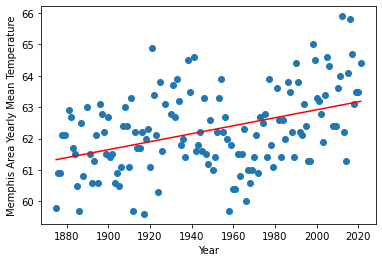

In [116]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

x = new_df['Year'][..., np.newaxis]
y = new_df['Annual']

lm = LinearRegression()
lm.fit(x, y)

pred = lm.predict(x)
r2 = lm.score(x, y)
print('coef: {}, R^2: {}'.format(lm.coef_, r2))

plt.scatter(x[:, 0], y)
plt.xlabel('Year')
plt.ylabel('Memphis Area Yearly Mean Temperature')
plt.plot(x, pred, 'r')

### The Effects

In the southeast region of the United States which Memphis is a part of we are facing Sea level rises, Extreme heat, and Decreased water availability. Below we look into sea level data from a regional tide gauge located in Beaufort, North Carolina obtained from https://tidesandcurrents.noaa.gov/. Just like the last data we take out outliers and show it is once again a positive relationship. I don't think I need a graph to explain why rising sea levels is a bad thing.

In [117]:
df1 = pd.read_excel('8656483_meantrend.xlsx')
df1

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1953,1,-0.073,-0.126,-0.112,-0.141
1,1953,2,-0.164,-0.126,-0.112,-0.140
2,1953,3,-0.117,-0.126,-0.111,-0.140
3,1953,4,-0.108,-0.126,-0.111,-0.140
4,1953,5,-0.128,-0.125,-0.111,-0.140
...,...,...,...,...,...,...
728,2021,6,0.091,0.099,0.112,0.086
729,2021,7,0.142,0.099,0.112,0.086
730,2021,8,0.134,0.099,0.113,0.086
731,2021,9,0.110,0.100,0.113,0.087


Text(0, 0.5, 'Monthly Meters from Sea Level')

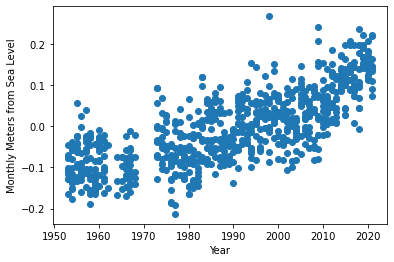

In [118]:
x = df1['Year']
y = df1[' Monthly_MSL']
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Monthly Meters from Sea Level')

coef: [0.00334287], R^2: 0.5497647945573805


<ipython-input-119-445442930bd0>:7: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



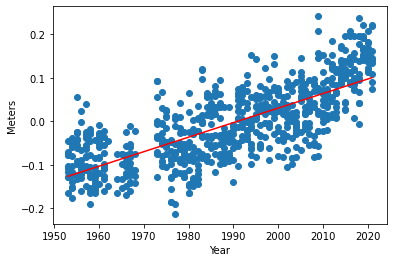

In [119]:
z_scores = stats.zscore(df1)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df1[filtered_entries]

x = new_df['Year'][..., np.newaxis]
y = new_df[' Monthly_MSL']

lm = LinearRegression()
lm.fit(x, y)

pred = lm.predict(x)
r2 = lm.score(x, y)
print('coef: {}, R^2: {}'.format(lm.coef_, r2))

plt.scatter(x[:, 0], y)
plt.xlabel('Year')
plt.ylabel('Meters')
plt.plot(x, pred, 'r')

### Why is This Happening?

Human activities (primarily the burning of fossil fuels) have fundamentally increased the concentration of greenhouse gases in Earth’s atmosphere, warming the planet. The following data is that of the air quality index in shelby county calculated by taking into account multiple types of greenhouse gases. It was obtained from https://www.epa.gov/

In [120]:
df2 = pd.read_excel('ad_viz_tile_data.xlsx')
df2.reset_index(level=0, inplace=True)
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Month'] = df2['Month'].apply(lambda x: calendar.month_abbr[x])
df2['Day'] = df2['Date'].dt.day
df2

,index,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source,Year,Month,Day
0,0,1980-01-01,28,NO2,NaN,47-157-0030,AQS,1980,Jan,1
1,1,1980-01-02,47,NO2,NaN,47-157-0032,AQS,1980,Jan,2
2,2,1980-01-03,38,NO2,NaN,47-157-0030,AQS,1980,Jan,3
3,3,1980-01-04,19,NO2,NaN,47-157-0026,AQS,1980,Jan,4
4,4,1980-01-05,87,CO,Alabama Ave. Station,47-157-0024,AQS,1980,Jan,5
...,...,...,...,...,...,...,...,...,...,...
9492,9492,2005-12-27,42,Ozone,NaN,47-157-2005,AQS,2005,Dec,27
9493,9493,2005-12-28,62,PM2.5,GUTHRIE CLINIC PM 2.5,47-157-0047,AQS,2005,Dec,28
9494,9494,2005-12-29,46,PM2.5,NaN,47-157-0038,AQS,2005,Dec,29
9495,9495,2005-12-30,59,PM2.5,GUTHRIE CLINIC PM 2.5,47-157-0047,AQS,2005,Dec,30


In [121]:
fig = px.line_polar(df2, r=' AQI Value', theta='Month', color='Year')

fig.update_traces(fill='toself')
fig.show()

Text(0, 0.5, 'AQI Value')

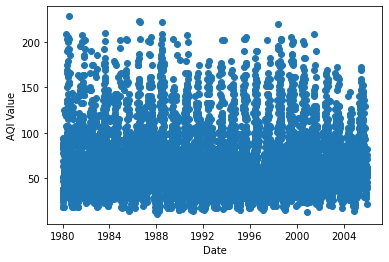

In [122]:
x = df2['Date']
y = df2[' AQI Value']
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('AQI Value')

C:\Users\Kenzi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Kenzi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel=' AQI Value', ylabel='Density'>

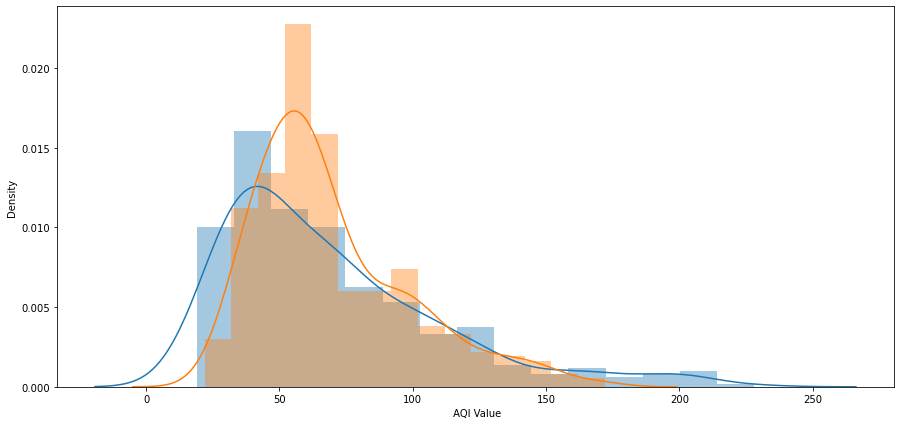

In [123]:
df2_hist = df2[(df2['Year'] == 1980)]
plt.figure(figsize=(15,7))
sns.distplot(df2_hist[' AQI Value'])
df2_hist1 = df2[(df2['Year'] == 2005)]
sns.distplot(df2_hist1[' AQI Value'])

### What is likely to happen?

The current trends are likely to continue on their current course unless human intervention is used enough. This means higher temp, sea level, and a drop in air quality. I have used linear regression to show possible future changes in both temperature and sea level.

In [124]:
df = pd.read_excel('memphis area monthly summarized data por to 2021 mean average temperature.xlsx')
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1875,34.0,40.3,50.8,57.5,68.9,79.4,82.8,75.5,69.8,57.2,51.5,49.7,59.8
1,1876,48.3,48.5,48.3,63.0,71.7,78.2,82.8,80.2,70.4,58.8,48.2,32.3,60.9
2,1877,38.9,46.3,49.3,59.1,69.7,77.3,79.7,77.9,71.4,63.2,47.4,50.5,60.9
3,1878,40.7,45.2,59.5,65.2,71.3,76.2,83.5,82.0,71.4,61.1,51.5,37.0,62.1
4,1879,38.4,41.8,55.5,60.9,72.3,77.1,84.1,76.0,70.5,66.8,54.9,46.7,62.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2017,48.5,54.8,57.0,66.6,70.7,78.4,83.1,79.4,75.4,65.2,54.9,42.4,64.7
143,2018,37.4,49.8,54.1,56.3,77.4,81.9,83.0,81.3,77.8,65.3,47.9,45.6,63.1
144,2019,41.8,48.8,50.6,62.7,73.8,77.7,81.5,82.2,83.5,64.0,48.0,47.7,63.5
145,2020,46.7,45.7,58.5,60.3,69.4,78.9,84.1,80.7,74.5,62.8,56.4,44.3,63.5


coef: [0.0127244], R^2: 0.17305534892380348


<ipython-input-125-23f928dcca6f>:7: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Text(0, 0.5, 'Memphis Area Yearly Mean Temperature')

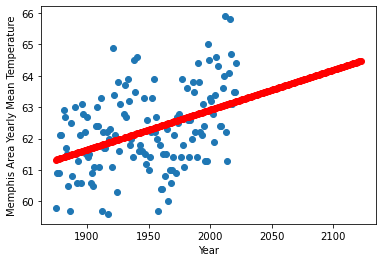

In [125]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

x = new_df['Year'][..., np.newaxis]
y = new_df['Annual']

lm = LinearRegression()
lm.fit(x, y)

future_x = np.append(x, np.linspace(2022,2122,101))[..., np.newaxis]
pred = lm.predict(future_x)
r2 = lm.score(x, y)
print('coef: {}, R^2: {}'.format(lm.coef_, r2))

plt.scatter(x, y)
plt.scatter(future_x, pred, c='r')
plt.xlabel('Year')
plt.ylabel('Memphis Area Yearly Mean Temperature')

In [126]:
df1 = pd.read_excel('8656483_meantrend.xlsx')
df1

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1953,1,-0.073,-0.126,-0.112,-0.141
1,1953,2,-0.164,-0.126,-0.112,-0.140
2,1953,3,-0.117,-0.126,-0.111,-0.140
3,1953,4,-0.108,-0.126,-0.111,-0.140
4,1953,5,-0.128,-0.125,-0.111,-0.140
...,...,...,...,...,...,...
728,2021,6,0.091,0.099,0.112,0.086
729,2021,7,0.142,0.099,0.112,0.086
730,2021,8,0.134,0.099,0.113,0.086
731,2021,9,0.110,0.100,0.113,0.087


coef: [0.00334287], R^2: 0.5497647945573805


<ipython-input-127-510e2e70c51a>:7: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



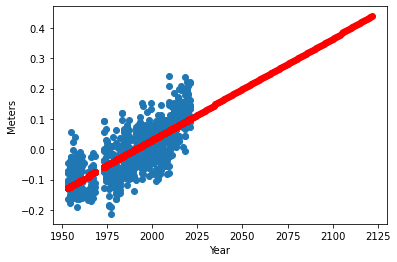

In [127]:
z_scores = stats.zscore(df1)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df1[filtered_entries]

x = new_df['Year'][..., np.newaxis]
y = new_df[' Monthly_MSL']

lm = LinearRegression()
lm.fit(x, y)

future_x = np.append(x, np.linspace(2022,2122,101))[..., np.newaxis]
pred = lm.predict(future_x)
r2 = lm.score(x, y)
print('coef: {}, R^2: {}'.format(lm.coef_, r2))

plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Meters')
plt.scatter(future_x, pred, c='r')

### What Should we Do?

The best we can do is continue with conservation efforts to reverse the effects as much as possible. As shown with the data here https://cfpub.epa.gov/ limiting production of greenhouse gases does have a good effect. This data is the total emissions data recorded by the environmental protection agency annually.  

In [128]:
df3 = pd.read_excel('data.xlsx')
df3

,"Emissions by Economic Sector, MMT CO2 eq.",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Year,Total
0,Transportation,1526.622794,1480.489044,1540.034504,1577.034801,1631.976758,1667.146555,1723.370543,1749.961462,1792.412211,...,1749.424799,1751.910826,1785.920221,1794.054456,1829.968791,1847.329197,1878.199037,1875.730588,1990,6442.650626
1,Electricity generation,1875.705423,1871.728211,1886.715101,1962.470913,1987.274097,2003.999184,2077.064892,2143.225639,2229.740835,...,2071.205645,2089.977324,2090.124498,1950.021956,1857.612566,1778.851683,1798.044517,1648.111470,1991,6373.621135
2,Industry,1640.708734,1613.561094,1649.060420,1620.199787,1645.608862,1662.524796,1691.903156,1691.272865,1661.799988,...,1415.442997,1466.493650,1450.982944,1441.612574,1402.224053,1423.414702,1483.289677,1504.831223,1992,6486.343836
3,Agriculture,600.179282,590.848100,591.680134,619.761753,606.987183,619.217854,626.181037,614.720383,621.815493,...,609.514748,647.866222,657.538625,658.475555,645.779373,646.556484,661.970566,669.459694,1993,6604.349889
4,Commercial,429.201077,436.457198,432.125003,425.584360,428.867784,427.994691,435.650541,428.151671,402.957417,...,398.908907,422.257398,432.621856,445.411375,430.132615,431.876683,447.337393,455.339930,1994,6691.822829
5,Residential,345.070789,354.689750,361.222025,372.612499,363.260147,367.523521,399.454803,380.828659,346.873254,...,306.938959,357.735865,378.297980,351.502782,327.840961,329.908870,377.251035,379.513730,1995,6775.860245
6,U.S. territories,25.162525,25.847739,25.506648,26.685777,27.847999,27.453643,27.540404,28.347361,27.670070,...,34.471712,28.427824,29.470584,30.033367,26.779480,25.353713,25.357175,25.358545,1996,6981.165376
7,Total,6442.650626,6373.621135,6486.343836,6604.349889,6691.822829,6775.860245,6981.165376,7036.508040,7083.269267,...,6585.907766,6764.669110,6824.956709,6671.112065,6520.337839,6483.291331,6671.449401,6558.345179,1997,7036.508040
8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998,7083.269267
9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999,7125.399029


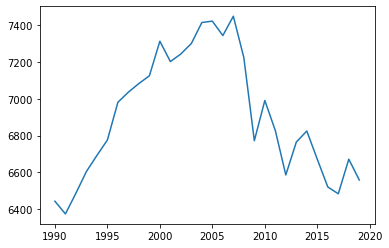

In [129]:
x = df3['Year']
y = df3['Total']
plt.plot(x, y)